In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from datetime import date, datetime, timedelta

from water_pollution.api import ann_utils as util

In [4]:
# Station_id, choisi par l'interface
station_id = 6000998

In [5]:
# Resquests the API
#url = 'http://localhost:8080/predict'
url = 'https://api-te5jtpgwkq-ew.a.run.app/predict'
params = { 'station_id':station_id}
response = requests.get(url,params)

In [6]:
response

<Response [200]>

In [7]:
# Converts the response to a dataframe
jr = response.json()
preddf = pd.DataFrame(jr)
preddf.date = pd.to_datetime(preddf.date)
preddf.set_index('date',inplace=True)

preddf

,precipitation,temp,prediction
date,,,
2021-08-10,6.957143,13.7250,4.975325
2021-08-11,7.211429,14.0600,5.086549
2021-08-12,7.591429,14.4875,5.203594
2021-08-13,7.362857,14.9775,5.102756
2021-08-14,7.362857,15.3800,5.081325
...,...,...,...
2021-12-11,0.625714,8.0300,10.979283
2021-12-12,0.848571,7.7875,11.109204
2021-12-13,1.040000,7.5625,11.199736


(18842.65, 18982.35)


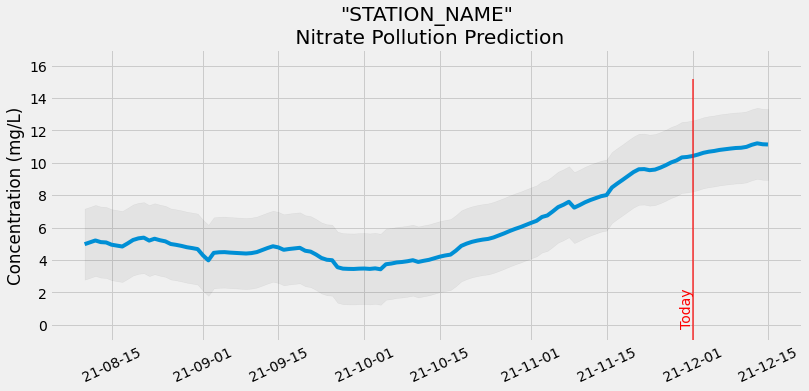

In [8]:
with plt.style.context('fivethirtyeight'):
    
    # Used Variables
    today = date.today()
    rmse = 2.19
    station_name = "STATION_NAME" # CHANGE IT IN FRONT
    
    plt.figure(figsize=(12,5))
    ax = plt.gca()
    
    # Date Format
    dt_fmt = mdates.DateFormatter('%y-%m-%d')
    ax.xaxis.set_major_formatter(dt_fmt)
    
    # Prediction Plot
    plt.title(f'"{station_name}"\n Nitrate Pollution Prediction')
    plt.plot(preddf.index,preddf.prediction)
    plt.ylabel('Concentration (mg/L)')

    
    # Plots the rmse delta
    plt.fill_between(preddf.index,
                     preddf.prediction - rmse,
                     preddf.prediction + rmse,
                     color='k',alpha=.05)

    # Plots the today line
    ax.axvline(x=today, ymin=0., ymax=0.9, c='red', alpha=0.6, linewidth=2)
    ax.text(today-timedelta(1), 0,"Today", alpha=1,ha='center',color='red',rotation=90) # centré
    
    plt.xticks(rotation=25)
    
    plt.ylim(bottom=-1)
    plt.ylim(top=plt.ylim()[1]+3)
    print(plt.xlim())
    plt.show()
    